✅ TensorFlow version: 2.20.0

📂 Loading MNIST dataset from local file: mnist.npz
Training data shape: (60000, 784)
Test data shape: (10000, 784)

🔹 Training with Sigmoid Activation...
Epoch 1: Loss=0.6739, Val Acc=88.86%
Epoch 2: Loss=0.3528, Val Acc=90.77%
Epoch 3: Loss=0.3144, Val Acc=91.26%
Epoch 4: Loss=0.2932, Val Acc=91.75%
Epoch 5: Loss=0.2770, Val Acc=92.17%
Epoch 6: Loss=0.2625, Val Acc=92.58%
Epoch 7: Loss=0.2490, Val Acc=92.97%
Epoch 8: Loss=0.2361, Val Acc=93.38%
Epoch 9: Loss=0.2240, Val Acc=93.70%
Epoch 10: Loss=0.2127, Val Acc=94.04%

🔹 Training with Tanh Activation...
Epoch 1: Loss=0.3769, Val Acc=91.93%
Epoch 2: Loss=0.2467, Val Acc=93.58%
Epoch 3: Loss=0.1959, Val Acc=94.75%
Epoch 4: Loss=0.1605, Val Acc=95.55%
Epoch 5: Loss=0.1352, Val Acc=96.01%
Epoch 6: Loss=0.1163, Val Acc=96.37%
Epoch 7: Loss=0.1017, Val Acc=96.70%
Epoch 8: Loss=0.0901, Val Acc=96.93%
Epoch 9: Loss=0.0806, Val Acc=97.05%
Epoch 10: Loss=0.0728, Val Acc=97.21%

🔹 Training with ReLU Activation...
Ep

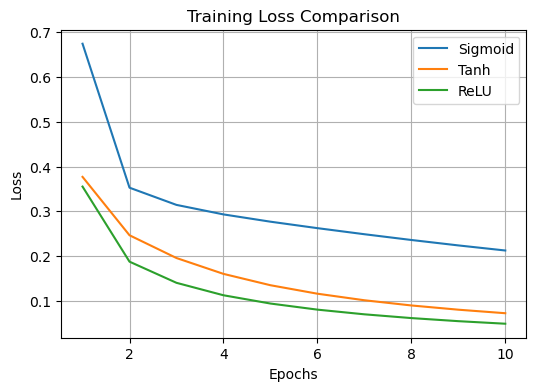

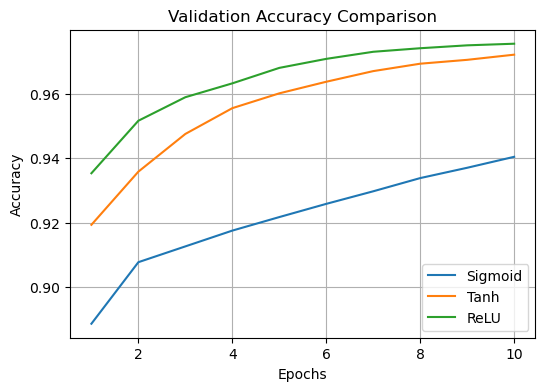

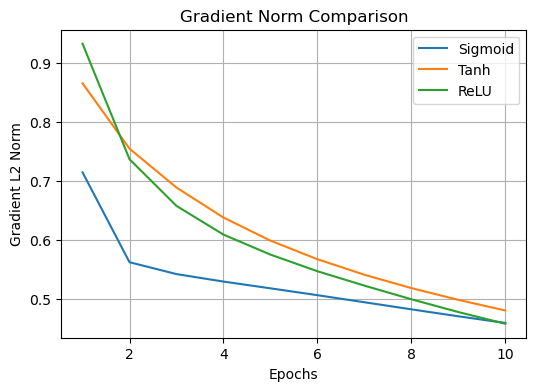


✅ Experiment complete! Check the above plots for comparison.


In [3]:
# ------------------------------------------------------------
# OFFLINE MNIST ACTIVATION FUNCTION COMPARISON (TensorFlow)
# ------------------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

print("✅ TensorFlow version:", tf.__version__)

# ------------------------------------------------------------
# Step 1: Load Offline MNIST Dataset
# ------------------------------------------------------------
local_path = "mnist.npz"  # ⚠️ Ensure this file exists in Jupyter home directory

if os.path.exists(local_path):
    print(f"\n📂 Loading MNIST dataset from local file: {local_path}")
    (X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data(path=local_path)
else:
    raise FileNotFoundError(f"❌ Could not find {local_path}. Place it in the same folder as this notebook.")

# Normalize and reshape
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# ------------------------------------------------------------
# Step 2: Define MLP Model Function
# ------------------------------------------------------------
def build_model(activation):
    model = keras.Sequential([
        layers.Dense(256, activation=activation, input_shape=(784,)),
        layers.Dense(10, activation='softmax')
    ])
    return model

# ------------------------------------------------------------
# Step 3: Training Function
# ------------------------------------------------------------
def train_model(activation_fn, epochs=10):
    model = build_model(activation_fn)
    optimizer = keras.optimizers.SGD(learning_rate=0.1)
    loss_fn = keras.losses.SparseCategoricalCrossentropy()
    
    train_loss, val_acc, grad_norms = [], [], []

    for epoch in range(epochs):
        # ---- Training ----
        batch_losses = []
        grads_norm_epoch = []

        for i in range(0, len(X_train), 64):
            x_batch = X_train[i:i+64]
            y_batch = y_train[i:i+64]

            with tf.GradientTape() as tape: #automrtic differentiation
                preds = model(x_batch, training=True)#forward pass
                loss = loss_fn(y_batch, preds)#computs loss

            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
            batch_losses.append(loss.numpy())

            # Compute L2 gradient norm
            total_norm = np.sqrt(sum(np.sum(np.square(g.numpy())) for g in grads if g is not None))
            grads_norm_epoch.append(total_norm)

        train_loss.append(np.mean(batch_losses))#avg loss for epoch
        grad_norms.append(np.mean(grads_norm_epoch))

        # ---- Validation ----
        preds = model.predict(X_test, verbose=0)
        val_predictions = np.argmax(preds, axis=1)
        accuracy = np.mean(val_predictions == y_test)
        val_acc.append(accuracy)

        print(f"Epoch {epoch+1}: Loss={train_loss[-1]:.4f}, Val Acc={val_acc[-1]*100:.2f}%")

    return train_loss, val_acc, grad_norms

# ------------------------------------------------------------
# Step 4: Train Models with Different Activations
# ------------------------------------------------------------
activations = {
    "Sigmoid": "sigmoid",
    "Tanh": "tanh",
    "ReLU": "relu"
}

results = {}

for name, act in activations.items():
    print(f"\n🔹 Training with {name} Activation...")
    results[name] = train_model(act)

# ------------------------------------------------------------
# Step 5: Plot Metrics
# ------------------------------------------------------------
epochs = range(1, 11)

def plot_metric(index, title, ylabel):
    plt.figure(figsize=(6,4))
    for name in results:
        plt.plot(epochs, results[name][index], label=name)
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Loss, Accuracy, and Gradient Norm
plot_metric(0, "Training Loss Comparison", "Loss")
plot_metric(1, "Validation Accuracy Comparison", "Accuracy")
plot_metric(2, "Gradient Norm Comparison", "Gradient L2 Norm")

print("\n✅ Experiment complete! Check the above plots for comparison.")
